In [1]:
import os
dir_path = os.getcwd()
print("The directory of this script is:", dir_path)
root_path = os.path.dirname(dir_path)
print("The root directory is:", root_path)

The directory of this script is: c:\Users\HP\Desktop\Projects\WebMining-RecSys-20251\notebooks
The root directory is: c:\Users\HP\Desktop\Projects\WebMining-RecSys-20251


In [3]:
import pandas as pd
data = pd.read_csv(f"{root_path}/ml-100k/u.data",sep = '\t', header = None, names = ['user_id', 'item_id', 'rating', 'timestamp'])
data

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


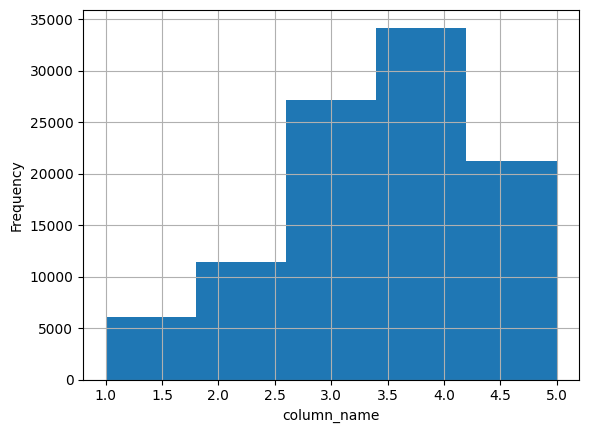

In [4]:
import matplotlib.pyplot as plt

data["rating"].hist(bins=5)
plt.xlabel("column_name")
plt.ylabel("Frequency")
plt.show()


In [15]:
print("Min rating:", data["rating"].min())
print("Max rating:", data["rating"].max())
print("Mean rating:", data["rating"].mean())
print("Median rating:", data["rating"].median())

Min rating: 1
Max rating: 5
Mean rating: 3.52986
Median rating: 4.0


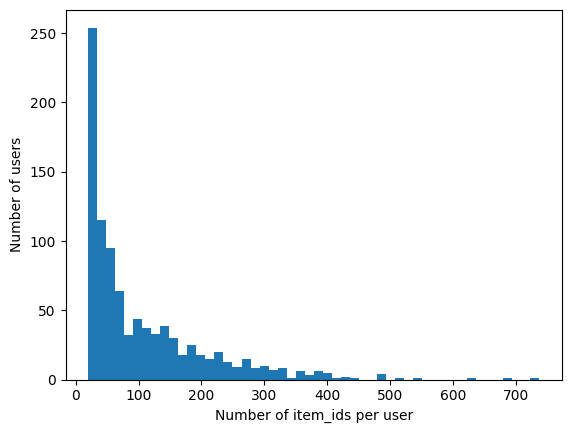

In [8]:
user_item_counts = data.groupby("user_id")["item_id"].count()
plt.hist(user_item_counts, bins=50)
plt.xlabel("Number of item_ids per user")
plt.ylabel("Number of users")
plt.show()

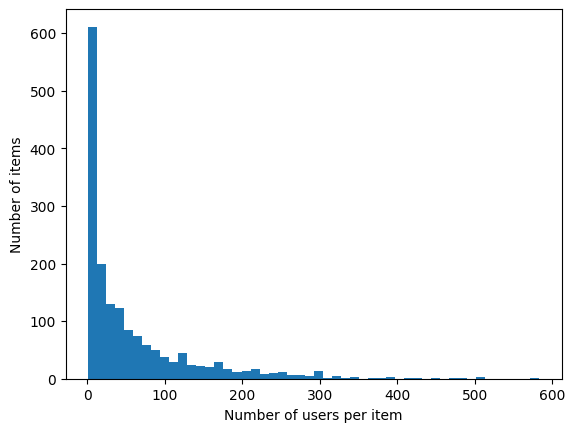

In [9]:
item_user_counts = data.groupby("item_id")["user_id"].count()
plt.hist(item_user_counts, bins=50)
plt.xlabel("Number of users per item")
plt.ylabel("Number of items")
plt.show()

In [12]:
user_item_counts

user_id
1      272
2       62
3       54
4       24
5      175
      ... 
939     49
940    107
941     22
942     79
943    168
Name: item_id, Length: 943, dtype: int64

In [11]:
user_item_counts.describe()

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: item_id, dtype: float64

In [13]:
item_user_counts

item_id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: user_id, Length: 1682, dtype: int64

In [14]:
item_user_counts.describe()

count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: user_id, dtype: float64

In [16]:
column_names = [
        'movie_id', 'movie_title', 'release_date', 'video_release_date', 
        'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation',
        'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
        'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
        'Thriller', 'War', 'Western']
movies = pd.read_csv(f"{root_path}/ml-100k/u.item", sep='|', header=None, names=column_names, encoding='latin-1')
movies

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


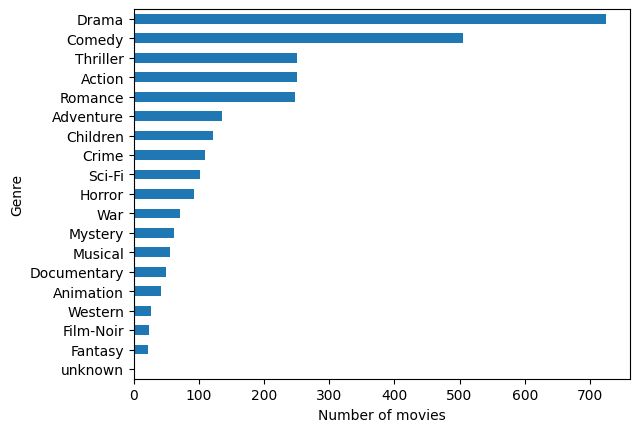

In [19]:
genre_cols = column_names[5:]
genre_counts = movies[genre_cols].sum()

plt.figure()
genre_counts.sort_values(ascending=True).plot(kind="barh")
plt.ylabel("Genre")
plt.xlabel("Number of movies")
plt.show()

count    1682.000000
mean        1.719976
std         0.868207
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: num_genres, dtype: float64


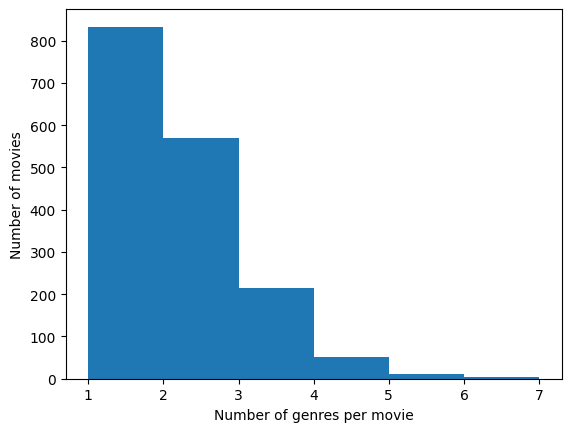

In [25]:
movies["num_genres"] = movies[genre_cols].sum(axis=1)
print(movies["num_genres"].describe())
plt.hist(movies["num_genres"], bins=range(1, movies["num_genres"].max() + 2))
plt.xlabel("Number of genres per movie")
plt.ylabel("Number of movies")
plt.show()


In [28]:
movies["user_counts"] = movies["movie_id"].map(item_user_counts).fillna(0).astype(int)
movies[["movie_title", "user_counts"]].sort_values(by="user_counts", ascending=False)

,movie_title,user_counts
49,Star Wars (1977),583
257,Contact (1997),509
99,Fargo (1996),508
180,Return of the Jedi (1983),507
293,Liar Liar (1997),485
...,...,...
1575,"Hungarian Fairy Tale, A (1987)",1
1576,"Death in the Garden (Mort en ce jardin, La) (1...",1
1347,Every Other Weekend (1990),1
1578,Baton Rouge (1988),1
